# <font color="#0000E0">K513 Final Project - Will a Product Sell Well in Wish</font>

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.linear_model import LinearRegression
# Data transformers
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data Partitioning
from sklearn.model_selection import train_test_split

# Add polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# Performance metrics
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, precision_recall_curve, roc_curve, auc

## <font color="#0000E0">Part 1 Exploratory Data Analysis (EDA) and Prepare Data</font>

### Import data and understand data

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
np.set_printoptions(suppress=True, linewidth=200, edgeitems=100)

In [3]:
#Reading the csv into a dataframe
df = pd.read_csv('summer product sales.csv')
df

,title,price,retail_price,currency,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_url,product_picture,product_id,theme
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,...,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,...,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,...,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,...,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,...,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,...,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,3.0,...,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,15.0,...,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,1.0,...,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer


In [4]:
# get the number of rows and columns
df.shape

(1573, 40)

In [5]:
# Get data types of columns, number of valid values in each column
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency                      1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

In [6]:
#Looking up column names
df.columns 

Index(['title', 'price', 'retail_price', 'currency', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture', 'product_url',
       'product_picture', 'product_id', 'theme'],
      dtype='object')

In [7]:
# Summary statistics for numerical variables
df.describe()  

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


### Clean and Prepare Data

In [8]:
#Dropping unwanted columns
df = df.drop(['currency', 'badges_count','product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'has_urgency_banner','origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_has_profile_picture', 'product_url',
       'product_picture','theme'], axis=1)

In [9]:
# Get data types of columns, number of valid values in each column after dropping unwanted columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1573 non-null   object 
 1   price                  1573 non-null   float64
 2   retail_price           1573 non-null   int64  
 3   units_sold             1573 non-null   int64  
 4   uses_ad_boosts         1573 non-null   int64  
 5   rating                 1573 non-null   float64
 6   rating_count           1573 non-null   int64  
 7   rating_five_count      1528 non-null   float64
 8   rating_four_count      1528 non-null   float64
 9   rating_three_count     1528 non-null   float64
 10  rating_two_count       1528 non-null   float64
 11  rating_one_count       1528 non-null   float64
 12  badge_local_product    1573 non-null   int64  
 13  badge_product_quality  1573 non-null   int64  
 14  badge_fast_shipping    1573 non-null   int64  
 15  tags

In [10]:
#Looking for duplicate rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1568    False
1569    False
1570    False
1571    False
1572    False
Length: 1573, dtype: bool

In [11]:
#Using a combination of profuct_id and merchant_id to keep unique rows
df.drop_duplicates(['product_id', 'merchant_id'], keep='last',inplace=True)

In [12]:
# get the top 5 rows

df.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,tags,inventory_total,urgency_text,merchant_rating_count,merchant_rating,merchant_id,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.0,8.0,10.0,...,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",50,Quantité limitée !,568,4.128521,595097d6a26f6e070cb878d1,5e9ae51d43d6a96e303acdb0
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.0,1027.0,1118.0,...,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",50,Quantité limitée !,17752,3.899673,56458aa03a698c35c9050988,58940d436a0d3d5da4e95a38
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.0,4.0,2.0,...,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",50,Quantité limitée !,295,3.989831,5d464a1ffdf7bc44ee933c65,5ea10e2c617580260d55310a
5,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.0,0.0,0.0,...,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",50,NaN,65,3.507692,5e4b9c3801ba9d210036fc5a,5ec645bafd107a02279c8c54
6,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.0,1352.0,971.0,...,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",50,NaN,10194,4.076516,5652f4053a698c76dc9a3f37,5c63a337d5e2ce4bbb3152cf


In [13]:
#Chekcing if worked
df.duplicated()

0       False
1       False
2       False
5       False
6       False
        ...  
1568    False
1569    False
1570    False
1571    False
1572    False
Length: 1341, dtype: bool

In [14]:
#Looking for missing values
df_missing = df.isnull()
df_missing.head(5)

,title,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,...,badge_local_product,badge_product_quality,badge_fast_shipping,tags,inventory_total,urgency_text,merchant_rating_count,merchant_rating,merchant_id,product_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [15]:
# get the number of missing values in each column
df_missing.sum()

title                      0
price                      0
retail_price               0
units_sold                 0
uses_ad_boosts             0
rating                     0
rating_count               0
rating_five_count         35
rating_four_count         35
rating_three_count        35
rating_two_count          35
rating_one_count          35
badge_local_product        0
badge_product_quality      0
badge_fast_shipping        0
tags                       0
inventory_total            0
urgency_text             975
merchant_rating_count      0
merchant_rating            0
merchant_id                0
product_id                 0
dtype: int64

In [16]:
# get to sum of total missing value
df_missing.sum().sum()

1150

In [17]:
# get the unique values and frequency of 'rating_four-count' column
df['rating_four_count'].value_counts()

1.0      67
0.0      65
2.0      50
4.0      42
3.0      41
         ..
153.0     1
542.0     1
137.0     1
324.0     1
642.0     1
Name: rating_four_count, Length: 440, dtype: int64

In [18]:
# Fill in missing Value in 'rating_four_count' column
df['rating_four_count'].fillna(0, inplace=True)

In [19]:
df['rating_four_count'].value_counts()

0.0      100
1.0       67
2.0       50
4.0       42
3.0       41
        ... 
153.0      1
542.0      1
137.0      1
324.0      1
642.0      1
Name: rating_four_count, Length: 440, dtype: int64

In [20]:
# Fill in missing value in all other rating count column
df['rating_five_count'].fillna(0, inplace=True)
df['rating_three_count'].fillna(0, inplace=True)
df['rating_two_count'].fillna(0, inplace=True)
df['rating_one_count'].fillna(0, inplace=True)

In [21]:
#Looking for missing values
df_missing = df.isnull()

In [22]:
# Check the new missing value
df_missing.sum()

title                      0
price                      0
retail_price               0
units_sold                 0
uses_ad_boosts             0
rating                     0
rating_count               0
rating_five_count          0
rating_four_count          0
rating_three_count         0
rating_two_count           0
rating_one_count           0
badge_local_product        0
badge_product_quality      0
badge_fast_shipping        0
tags                       0
inventory_total            0
urgency_text             975
merchant_rating_count      0
merchant_rating            0
merchant_id                0
product_id                 0
dtype: int64

In [23]:
# get the unique values and their frequency of 'title' column
df['title'].value_counts()

New Fashion Summer Women Casual Dress Round Neck Loose Big Swing Skirt Sleeveless Soild Color Beach dress                     13
Sexy Women's Summer Casual Sleeveless Evening Party Backless Beachwear Mini Dress                                              8
Summer Women s  Fashion  Lace Up Tie Pants  Plus Size Casual High Waist Short Pants                                            7
Summer Women Sling Dress V-neck Floral Pleated Strap Casual Pocket Large Dress                                                 6
Women's Summer Fashion Spaghetti Strap Floral Print Tie Front Mini Dress Sexy Dress                                            5
                                                                                                                              ..
2019 Women Sleeveless Solid Color Lace Halter Yoga Vest  Cotton Slim Fit Tank Top                                              1
(S-5XL) Women Fashion Summer Double-Layer Sports Shorts Quick-Drying Yoga Sports Leggings Fitness

In [24]:
# get the unique values and their frequency of 'tag' column
df['tags'].value_counts()

Summer,Fashion,Necks,Skirts,Dress,Loose,Women's Fashion,Round neck,beach dress,sleeveless,Beach,Casual,Women                                                                                                                                                                       9
Summer,Sling,Dresses,Dress,V-neck,Casual,Pocket,Women's Fashion,Sleeveless dress,women dress,Floral,sleeveless,Women,loose dress,Pleated,casual dress                                                                                                                              6
Mini,womens dresses,Summer,sleevele,Dress,Mini dress,Women's Fashion,Fashion,backless,party,sexy,summer dresses,Women S Clothing,Casual,sleeveless                                                                                                                                 4
Summer,Shorts,high waist shorts,high waist,Casual pants,pants,summer shorts,Waist,Slim Fit,Short pants,Women's Fashion,Plus Size,Lace Up,Women,Fashion,Casual,Lace       

In [25]:
# get the unique values and their frequency of 'urgency_text' column
df['urgency_text'].value_counts()

Quantité limitée !                  365
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [26]:
# Straighten inconsistent coding of data 
df['urgency_text'].replace({'Quantité limitée !':'1','Réduction sur les achats en gros':'2'}, inplace=True)

In [27]:
# fill in nan value
df['urgency_text'].fillna(0, inplace=True)

In [28]:
df['urgency_text']

0       1
1       1
2       1
5       0
6       0
       ..
1568    0
1569    1
1570    0
1571    0
1572    0
Name: urgency_text, Length: 1341, dtype: object

In [29]:
df['urgency_text'].value_counts()

0    975
1    365
2      1
Name: urgency_text, dtype: int64

In [30]:
df['women'] = 0
df.loc[df['tags'].str.contains('women', regex=False) == True, 'women'] = 1

In [31]:
df['summer'] = 0
df.loc[df['tags'].str.contains('summer', regex=False) == True, 'summer'] = 1

In [32]:
df['fashion'] = 0
df.loc[df['tags'].str.contains('fashion', regex=False) == True, 'fashion'] = 1

In [33]:
df['units_2k'] = 'Under 2k'
df.loc[df['units_sold'] >= 2000, 'units_2k'] = '2k & over'

In [34]:
df['units_2k'].value_counts()

Under 2k     856
2k & over    485
Name: units_2k, dtype: int64

In [35]:
df['women'].value_counts()

0    705
1    636
Name: women, dtype: int64

In [36]:
df['summer'].value_counts()

0    838
1    503
Name: summer, dtype: int64

In [37]:
df['fashion'].value_counts()

0    1242
1      99
Name: fashion, dtype: int64

### Basic Graphing

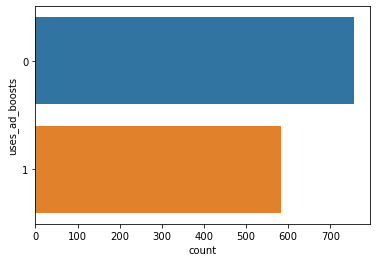

In [38]:
sns.countplot(y='uses_ad_boosts', data=df)
plt.show()

In [39]:
df.corr(method ='pearson')

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badge_local_product,badge_product_quality,badge_fast_shipping,inventory_total,merchant_rating_count,merchant_rating,women,summer,fashion
price,1.000000,0.317633,-0.043776,-0.070149,0.038876,-0.018927,-0.017760,-0.014937,-0.027788,-0.024660,-0.010098,0.067544,0.006904,0.084594,-0.177681,-0.030318,0.034921,0.033507,0.067167,0.010872
retail_price,0.317633,1.000000,0.008808,-0.024980,0.031452,0.052739,0.050524,0.060242,0.046990,0.044598,0.050200,0.024632,0.003361,0.035256,-0.001963,0.034837,0.063056,0.046111,0.008876,0.001390
units_sold,-0.043776,0.008808,1.000000,-0.023642,0.026177,0.898844,0.875780,0.891362,0.893082,0.865060,0.832029,-0.012681,0.063519,-0.004056,0.009375,0.272979,0.110917,-0.001521,-0.052851,-0.009454
uses_ad_boosts,-0.070149,-0.024980,-0.023642,1.000000,-0.035654,-0.053441,-0.051924,-0.052604,-0.051418,-0.054251,-0.051333,0.061073,0.015230,0.047411,0.046294,0.027459,-0.045963,-0.126429,-0.071618,-0.035166
rating,0.038876,0.031452,0.026177,-0.035654,1.000000,0.043586,0.092078,0.053182,-0.000068,-0.042579,-0.082028,-0.000576,0.279500,-0.016298,-0.058204,0.026364,0.257697,-0.026799,-0.065484,-0.017072
rating_count,-0.018927,0.052739,0.898844,-0.053441,0.043586,1.000000,0.982780,0.995927,0.981152,0.944917,0.909675,-0.006669,0.084762,0.044405,0.011621,0.259842,0.131073,0.005851,-0.037401,-0.002694
rating_five_count,-0.017760,0.050524,0.875780,-0.051924,0.092078,0.982780,1.000000,0.980538,0.930847,0.870344,0.824609,-0.001889,0.144146,0.038481,0.003072,0.248453,0.154902,-0.004024,-0.052126,-0.014464
rating_four_count,-0.014937,0.060242,0.891362,-0.052604,0.053182,0.995927,0.980538,1.000000,0.976235,0.932100,0.890413,-0.010327,0.081300,0.039638,0.016785,0.254015,0.133419,0.005913,-0.039280,-0.003818
rating_three_count,-0.027788,0.046990,0.893082,-0.051418,-0.000068,0.981152,0.930847,0.976235,1.000000,0.984615,0.951803,-0.012195,0.022477,0.044034,0.019574,0.266071,0.100481,0.015626,-0.021899,0.007951
rating_two_count,-0.024660,0.044598,0.865060,-0.054251,-0.042579,0.944917,0.870344,0.932100,0.984615,1.000000,0.983163,-0.013798,-0.017127,0.053182,0.021282,0.261501,0.080008,0.025134,-0.007638,0.017282


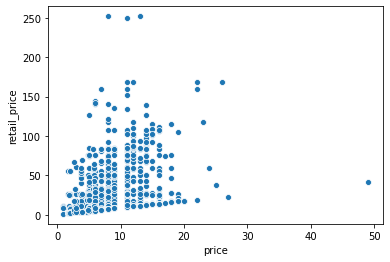

In [40]:
plt.rcParams['axes.facecolor'] = 'white'
ax = sns.scatterplot(x="price", y="retail_price", data=df)

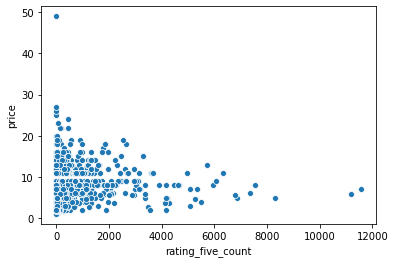

In [41]:
ax = sns.scatterplot(x="rating_five_count", y="price", data=df)

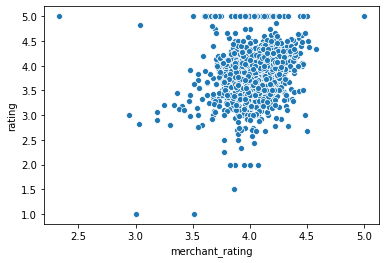

In [42]:
ax = sns.scatterplot(x="merchant_rating", y="rating", data=df)

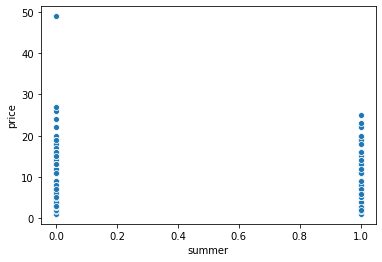

In [43]:
ax = sns.scatterplot(x="summer", y="price", data=df)

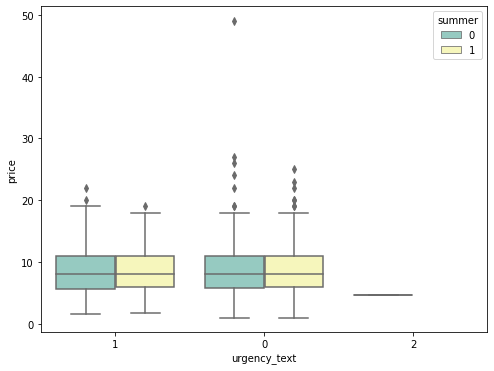

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='urgency_text', y='price', data=df, hue='summer', palette='Set3')

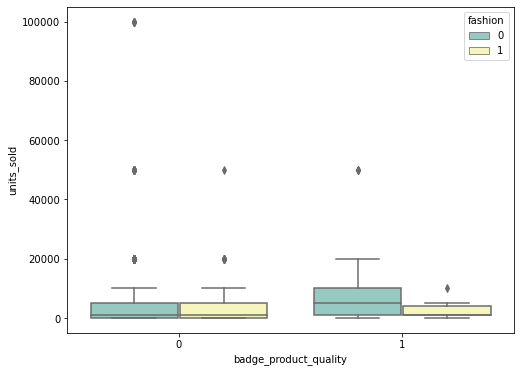

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='badge_product_quality', y='units_sold', data=df, hue='fashion', palette='Set3')


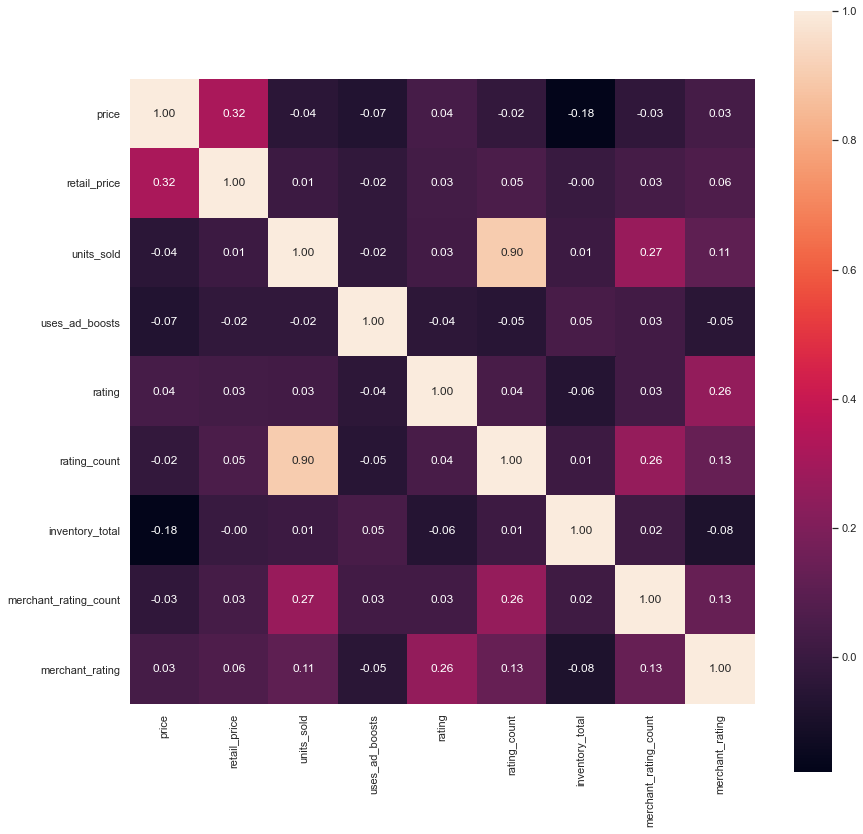

In [46]:
cols = ['price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count',
       'inventory_total', 'merchant_rating_count',
       'merchant_rating']

cm = np.corrcoef(df[cols].values.T)

plt.figure(figsize=(14, 14))

sns.set(font_scale=1)

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt= '.2f',

annot_kws={'size': 12}, yticklabels=cols, xticklabels=cols)

plt.show()

In [47]:
df.columns

Index(['title', 'price', 'retail_price', 'units_sold', 'uses_ad_boosts',
       'rating', 'rating_count', 'rating_five_count', 'rating_four_count',
       'rating_three_count', 'rating_two_count', 'rating_one_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'inventory_total', 'urgency_text', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'product_id', 'women', 'summer',
       'fashion', 'units_2k'],
      dtype='object')

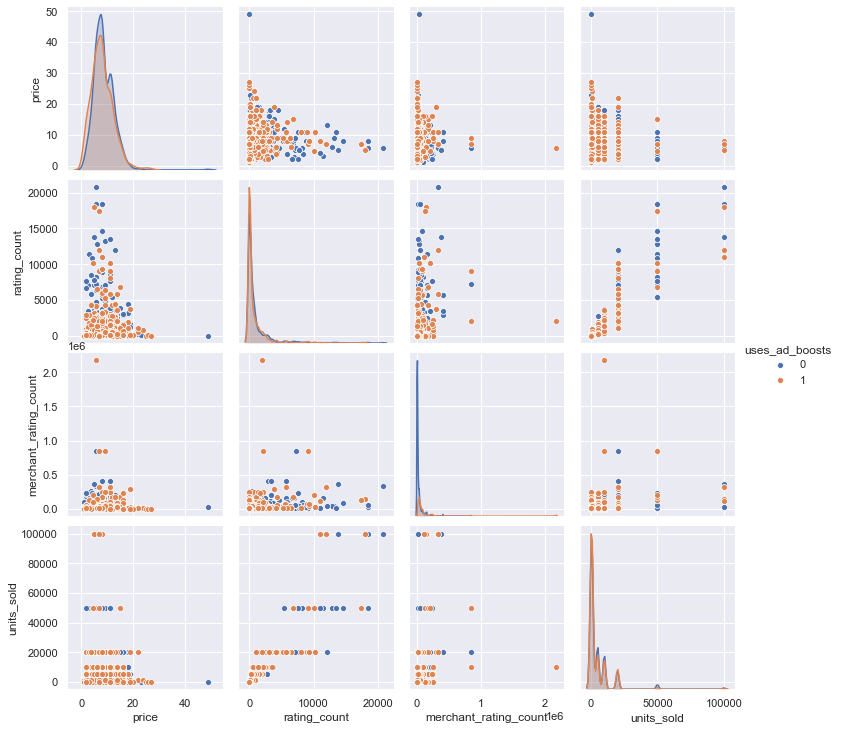

In [48]:
sns.pairplot(df, hue='uses_ad_boosts',vars=['price', 'rating_count','merchant_rating_count','units_sold'])
plt.show()

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  1341 non-null   object 
 1   price                  1341 non-null   float64
 2   retail_price           1341 non-null   int64  
 3   units_sold             1341 non-null   int64  
 4   uses_ad_boosts         1341 non-null   int64  
 5   rating                 1341 non-null   float64
 6   rating_count           1341 non-null   int64  
 7   rating_five_count      1341 non-null   float64
 8   rating_four_count      1341 non-null   float64
 9   rating_three_count     1341 non-null   float64
 10  rating_two_count       1341 non-null   float64
 11  rating_one_count       1341 non-null   float64
 12  badge_local_product    1341 non-null   int64  
 13  badge_product_quality  1341 non-null   int64  
 14  badge_fast_shipping    1341 non-null   int64  
 15  tags

## <font color="#0000E0">Part 2 Build Predictive Model</font>

### Prepare Data for Training
#### Define Predictors and Target Variable


In [50]:
#Predictors:
    #retail_price
    #uses_ad_boosts
    #rating_count
    #badge_fast_shipping
    #merchant_rating_count
    #women
    #summer
    #fashion

In [51]:
X1 = df[['retail_price', 'uses_ad_boosts', 'rating_count', 'badge_fast_shipping', 'merchant_rating_count','women','summer','fashion']]
y1 = df['units_sold']

### Split data into training and test sets

In [52]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, 
                                                    test_size=0.25, # You can uncomment it to try out different size
                                                    random_state=0)
print('Shape of training set ', X_train1.shape)
print('Shape of test set ', X_test1.shape)

Shape of training set  (1005, 8)
Shape of test set  (336, 8)


### Linear Regression

In [53]:
# step 1: import LinearRegression class
from sklearn.linear_model import LinearRegression
# step 2: create an instance of the model
linear_model = LinearRegression()
# step 3: train the model with training data
linear_model.fit(X_train1, y_train1)

LinearRegression()

In [54]:
# Step 4: Get the scores of both training and test
print('Training score:', linear_model.score(X_train1,y_train1))
print('Test score:    ', linear_model.score(X_test1,y_test1))

Training score: 0.8372079726557339
Test score:     0.7615821403941756


In [55]:
# Get model parameters. These are learned through the training
print("Weights (coefficients): {}".format(linear_model.coef_))
print("Bias (intercept): {:.2f}".format(linear_model.intercept_))

Weights (coefficients): [   -4.27002952   250.92220503     4.37700542 -2559.34803898     0.00355018   -69.16426493  -625.588958      33.79202279]
Bias (intercept): 751.58


### Standardize Data

In [56]:
X = df[['retail_price', 'uses_ad_boosts', 'rating_count', 'badge_fast_shipping', 'merchant_rating_count','women','summer','fashion']]
y = df['units_2k'] ##using derived value of units sold for classification models

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, # You can uncomment it to try out different size
                                                    random_state=0
                                                   )

In [58]:
# Import the standardScaler
from sklearn.preprocessing import StandardScaler
# Create an instance of StandardScaler
sc = StandardScaler()
# Fit the training data to the scaler
sc.fit(X_train) # calculate mean and std
X_train_scaled = sc.transform(X_train) # get the z-score for training data
X_test_scaled = sc.transform(X_test) # get the z-score for test data

### KNN Classification

In [59]:
# step 1: import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# step 2: Create an instance of the classifier
knn = KNeighborsClassifier(n_neighbors=25)
# step 3: fit the model with the scaled data
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=25)

In [60]:
# Step 4: print out the accuarcy of training and test data
print('Training accuracy:',knn.score(X_train_scaled, y_train))
print('Test accuracy:',knn.score(X_test_scaled, y_test))

Training accuracy: 0.8646766169154229
Test accuracy: 0.8541666666666666


In [61]:
# Step 5: Make Predictions for the test set
test_predicted_knn = knn.predict(X_test_scaled)
y_test_pred_knn = pd.Series(knn.predict(X_test_scaled))

### Logistic Regression

In [62]:
# Step 1: import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Step 2: Create an instance of the classifier 
logReg = LogisticRegression(C=10, solver='liblinear', multi_class = 'ovr',
                        random_state=1)
# Step 3: fit the model with the scaled data
logReg.fit(X_train_scaled, y_train)

LogisticRegression(C=10, multi_class='ovr', random_state=1, solver='liblinear')

In [63]:
# Step 4: print out the accuarcy of training and test data
print('Training accuracy:', logReg.score(X_train_scaled, y_train))
print('Test accuracy:', logReg.score(X_test_scaled, y_test))

Training accuracy: 0.9333333333333333
Test accuracy: 0.9345238095238095


In [64]:
# Step 5: Make Predictions for the test set
# Get the predicted probability and the predicted class
test_predicted_logReg = logReg.predict(X_test_scaled)
print('The Prediced Probabilities')
print(logReg.predict_proba(X_test_scaled)[0:5])

The Prediced Probabilities
[[0.00532507 0.99467493]
 [0.02179086 0.97820914]
 [0.90225125 0.09774875]
 [0.00165705 0.99834295]
 [0.99193009 0.00806991]]


In [65]:
y_test_pred_logReg = pd.Series(logReg.predict(X_test_scaled))

### Decision Tree

In [66]:
# Step 1: import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Step 2: Create an instance of the classifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, 
                              random_state=1)
# Step 3: fit the model with training data.
tree.fit(X_train, y_train)

y_test_pred_tree = pd.Series(tree.predict(X_test))

In [67]:
# Step 4: print out the accuarcy of training and test data
print('Training accuracy:', tree.score(X_train, y_train))
print('Test accuracy:', tree.score(X_test, y_test))


Training accuracy: 0.9402985074626866
Test accuracy: 0.9285714285714286


### Model Evaluation

In [68]:
######################################################################
# If your model is a classification problem, the score is the accuracy
# If your model is a regression problem, then score is the R^2
# Always check the meaning of 'score' of the model in sklearn documentation
print('Linear Regression Accuracy')
print('Training score:', linear_model.score(X_train1,y_train1))
print('Test score:    ', linear_model.score(X_test1,y_test1))
######################################################################
######################################################################
# For classification, if the data is not quite balanced, consider other metrics.
# You should also consider the cost of misclassification to the positive or negative side
# classification report has all the metrics. Logistic regression is used as example:
print("Classification Report for Logistic Regression")
print(classification_report(y_test, y_test_pred_logReg, ))
###
####
print("Classification Report for Decision Tree")
print(classification_report(y_test, y_test_pred_tree , )) 
###
####
print("Classification Report for KNN")
print(classification_report(y_test, y_test_pred_knn , )) 




Linear Regression Accuracy
Training score: 0.8372079726557339
Test score:     0.7615821403941756
Classification Report for Logistic Regression
              precision    recall  f1-score   support

   2k & over       0.94      0.90      0.92       138
    Under 2k       0.93      0.96      0.95       198

    accuracy                           0.93       336
   macro avg       0.94      0.93      0.93       336
weighted avg       0.93      0.93      0.93       336

Classification Report for Decision Tree
              precision    recall  f1-score   support

   2k & over       0.94      0.88      0.91       138
    Under 2k       0.92      0.96      0.94       198

    accuracy                           0.93       336
   macro avg       0.93      0.92      0.93       336
weighted avg       0.93      0.93      0.93       336

Classification Report for KNN
              precision    recall  f1-score   support

   2k & over       0.99      0.65      0.79       138
    Under 2k       0.80 

### Confusion Matrix

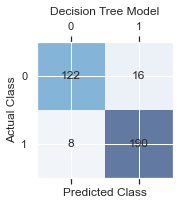

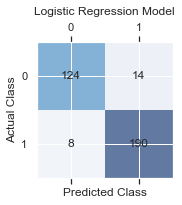

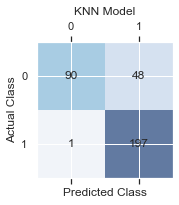

In [69]:

from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(confmat, title):
    fig, ax = plt.subplots(figsize=(2.5, 2.5),facecolor='w')
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.6)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted Class', labelpad=10)
    plt.ylabel('Actual Class')
    plt.title(title, pad=20)
    plt.show()
confusion_tree = confusion_matrix(y_test, y_test_pred_tree)
confusion_logReg = confusion_matrix(y_test, y_test_pred_logReg)
confusion_knn = confusion_matrix(y_test, y_test_pred_knn)

plot_confusion_matrix(confusion_tree, "Decision Tree Model")
plot_confusion_matrix(confusion_logReg, "Logistic Regression Model")
plot_confusion_matrix(confusion_knn, "KNN Model")

## Decision Tree Visualization

In [70]:
from sklearn.tree import export_text

In [71]:
tree_rules = export_text(tree, feature_names=list(X_train.columns))

In [72]:
print(tree_rules)

|--- rating_count <= 566.50
|   |--- rating_count <= 295.50
|   |   |--- rating_count <= 191.50
|   |   |   |--- class: Under 2k
|   |   |--- rating_count >  191.50
|   |   |   |--- class: Under 2k
|   |--- rating_count >  295.50
|   |   |--- retail_price <= 5.50
|   |   |   |--- class: 2k & over
|   |   |--- retail_price >  5.50
|   |   |   |--- class: Under 2k
|--- rating_count >  566.50
|   |--- rating_count <= 710.50
|   |   |--- retail_price <= 6.50
|   |   |   |--- class: 2k & over
|   |   |--- retail_price >  6.50
|   |   |   |--- class: Under 2k
|   |--- rating_count >  710.50
|   |   |--- rating_count <= 938.50
|   |   |   |--- class: 2k & over
|   |   |--- rating_count >  938.50
|   |   |   |--- class: 2k & over



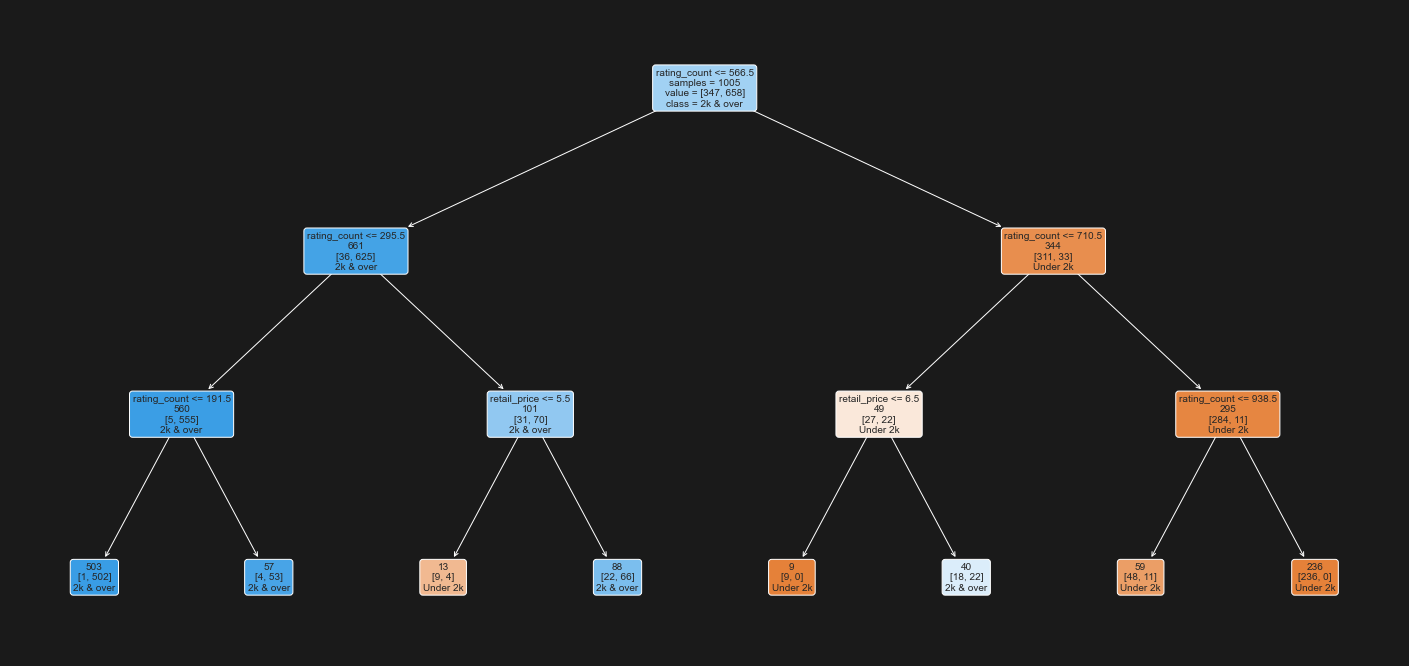

In [73]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25, 12), facecolor='k')


plot_tree(tree, filled=True, rounded=True, feature_names=X.columns, label='root',

class_names=['Under 2k', '2k & over'], proportion=False, fontsize=10,

precision=2, impurity=False)

plt.show()
